# 阈值化  

## 1、threshold()
图像的阈值化(有些场合也称二值化)是图像分割的一种，一般用于将感兴趣区域从背景中区分出来，处理过程就是将每个像素和阈值进行对比.如果像素值大于阈值，则为其分配一个值（可以是白色），否则为其分配另一个值（可以是黑色）。

使用的函数是cv.threshold。
- 函数第一个参数是源图像，它应该是灰度图像。
- 第二个参数是用于对像素值进行分类的阈值。
- 第三个参是maxVal，它表示如果像素值大于（有时小于）阈值则要给出的值。
- OpenCV提供不同类型的阈值，由函数的第四个参数决定。不同的类型有：
    - cv.THRESH_BINARY
    - cv.THRESH_BINARY_INV
    - cv.THRESH_TRUNC
    - cv.THRESH_TOZERO
    - cv.THRESH_TOZERO_INV

In [2]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

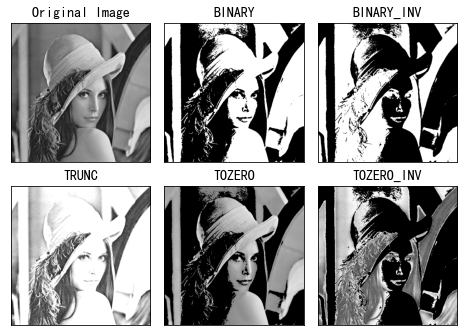

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./images/lena.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.subplots_adjust(wspace =0.1, hspace =-0.4)#调整子图间距
plt.show()

In [ ]:
import cv2


track_type = 'type'
track_type2 = 'type2' #treshold的二值化类型由2部分位或得到
track_thresh = 'thresh'   
track_type_max = 4  # type类型从0~4
track_type2_max = 16  # 可选8，16，其他参数无意义
track_thresh_max = 255
win_name = 'threshold-juzicode.com'
max_bin_val = 255

def threshold_func(v):
    threshold_type = cv2.getTrackbarPos(track_type,win_name)
    threshold_type2 = cv2.getTrackbarPos(track_type2,win_name)
    threshold_val = cv2.getTrackbarPos(track_thresh,win_name)
    print('threshold_type,threshold_type2,threshold_val',threshold_type,threshold_type2,threshold_val)
    _ , img_bin = cv2.threshold(img_gray,threshold_val,max_bin_val,threshold_type|threshold_type2)
    cv2.imshow(win_name,img_bin)
    

img_in = cv2.imread('./images/lena.jpg')
img_gray = cv2.cvtColor(img_in,cv2.COLOR_BGR2GRAY)
cv2.namedWindow(win_name)
cv2.createTrackbar(track_type,win_name,0,track_type_max,threshold_func)
cv2.createTrackbar(track_type2,win_name,0,track_type2_max,threshold_func)
cv2.createTrackbar(track_thresh,win_name,0,track_thresh_max,threshold_func)
cv2.imshow(win_name,img_gray)
cv2.waitKey() 
cv2.destroyAllWindows()

## 2、自适应阈值 adaptiveThreshold() 
我们使用全局值作为阈值，但在图像在不同区域具有不同照明条件的所有条件下可能并不好。在那种情况下，我们进行自适应阈值处理，算法计算图像的小区域的阈值，所以我们对同一幅图像的不同区域给出不同的阈值，这给我们在不同光照下的图像提供了更好的结果。 

这种阈值处理方法有三个指定输入参数和一个输出参数。

- Adaptive Method - 自适应方法，决定如何计算阈值。
    - cv.ADAPTIVE_THRESH_MEAN_C：阈值是邻域的平均值。
    - cv.ADAPTIVE_THRESH_GAUSSIAN_C：阈值是邻域值的加权和，其中权重是高斯窗口。
- Block Size - 邻域大小，它决定了阈值区域的大小。
- C - 它只是从计算的平均值或加权平均值中减去的常数。

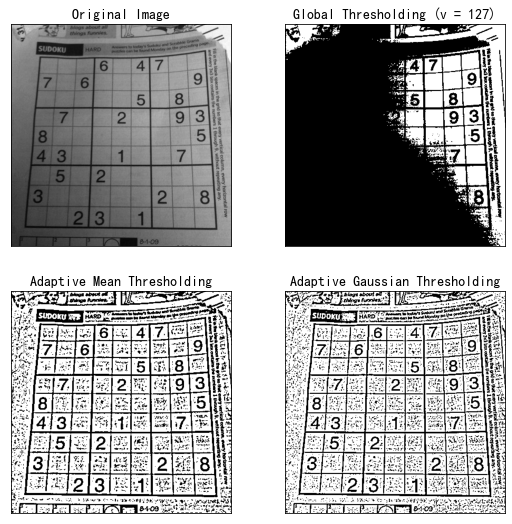

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/sudoku.jpg', 0)
# 中值滤波
#img = cv2.medianBlur(img, 5)
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 11 为 Block size 邻域大小 用来计算阈值的区域大小 ,
# 2 为 C值，常数， 阈值就等于的平均值或者加权平均值减去这个常数。
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


## 3、Otsu's 二值化 
在全局阈值处理中，我们使用任意值作为阈值，那么，我们如何知道我们选择的值是好还是不好？答案是，试错法。

但如果是双峰图像（简单来说，双峰图像是直方图有两个峰值的图像）我们可以将这些峰值中间的值近似作为阈值，这就是Otsu二值化的作用。

简单来说，它会根据双峰图像的图像直方图自动计算阈值。（对于非双峰图像，二值化不准确。 

需要多传递一个参数cv.THRESH_OTSU。这时要把阈值设为零。然后算法找到最佳阈值并返回第二个输出retVal。如果未使用Otsu二值化，则retVal与你设定的阈值相同。

请输入图像是嘈杂的图像。在第一种情况下，我将全局阈值应用为值127。在第二种情况下，我直接应用了Otsu的二值化。在第三种情况下，我使用5x5高斯卷积核过滤图像以消除噪声，然后应用Otsu阈值处理。来看看噪声过滤如何改善结果。

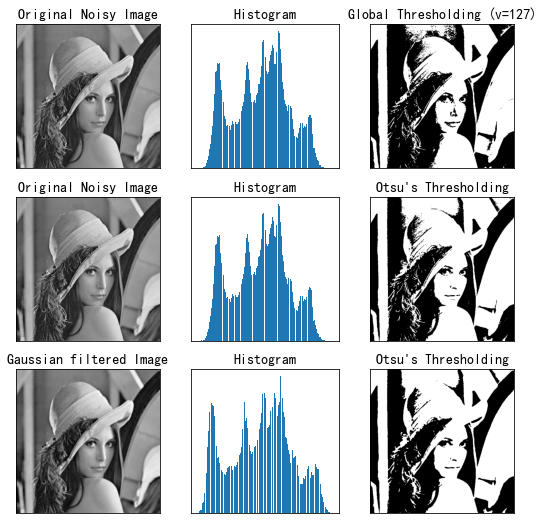

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg', 0)
# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# Otsu's thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
# 5,5 为 斯核的大小 0 为标准差
blur = cv2.GaussianBlur(img, (5, 5), 0)
# 阀值一定为 0
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]
# 使用了 pyplot 中画直方图的方法 plt.hist,
# 注意的是它的参数是一维数组
# 所以使用了 numpy ravel 方法 将多维数组 换成一维 也可以使用 flatten 方法
# ndarray.flat 1-D iterator over an array.
# ndarray.flatten 1-D array copy of the elements of an array in row-major order.

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
plt.show()
